In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from matplotlib import rc
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)


In [4]:
# Create an empty list to store the DataFrames
dfs = []

N_sims = 15

# Loop through the file names
for i in range(1, N_sims + 1):
    file_name = f'../data/data_endogenouswage/values_estimation_blp_{i}.csv'  # Assuming the files are in CSV format
    
    # Read the file as a DataFrame
    df = pd.read_csv(file_name)
    
    # Add a simulation number column
    df['simulation_number'] = i
    
    # Append the DataFrame to the list
    dfs.append(df)

# Concatenate all the DataFrames into one
combined_df = pd.concat(dfs, ignore_index=True)
print(combined_df.info())


combined_df = combined_df[(combined_df['sigma_rcl'] >= 0.03)
                          & (combined_df['sigma_blp'] >= 0.03)
                          & (combined_df['a_blp'] >= -5)
                          & (combined_df['a_rcl'] >= -5)]
print(combined_df.info())






<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   b2_ols             15 non-null     float64
 1   b3_ols             15 non-null     float64
 2   a_ols              15 non-null     float64
 3   b1_ols             15 non-null     float64
 4   a_iv               15 non-null     float64
 5   b2_iv              15 non-null     float64
 6   b3_iv              15 non-null     float64
 7   b1_iv              15 non-null     float64
 8   b1_blp             15 non-null     float64
 9   b2_blp             15 non-null     float64
 10  b3_blp             15 non-null     float64
 11  a_blp              15 non-null     float64
 12  sigma_blp          15 non-null     float64
 13  sigma_rcl          15 non-null     float64
 14  a_rcl              15 non-null     float64
 15  b2_rcl             15 non-null     float64
 16  b3_rcl             15 non-nu

In [5]:

from scipy.stats import ttest_1samp

# all the values from the blp 
t1= ttest_1samp(combined_df['b1_blp'], 2)
t2 = ttest_1samp(combined_df['b2_blp'], -0.3)
t3 = ttest_1samp(combined_df['b3_blp'], -0.3)
t4 = ttest_1samp(combined_df['a_blp'], -1.682)
t5 = ttest_1samp(combined_df['sigma_blp'], 0.340)


# all the values from the rcl 
t6 = ttest_1samp(combined_df['b1_rcl'], 2)
t7 = ttest_1samp(combined_df['b2_rcl'], -0.3)
t8 = ttest_1samp(combined_df['b3_rcl'], -0.3)
t9 = ttest_1samp(combined_df['a_rcl'], -1.682)
t10 = ttest_1samp(combined_df['sigma_rcl'], 0.340)


print(f"{t1}")
print(f"{t2}")
print(f"{t3}")
print(f"{t4}")
print(f"{t5}")
print(f"{t6}")
print(f"{t7}")
print(f"{t8}")
print(f"{t9}")
print(f"{t10}")

TtestResult(statistic=1.5169820898308197, pvalue=0.1635807010665903, df=9)
TtestResult(statistic=-0.32570356349926205, pvalue=0.752093605935926, df=9)
TtestResult(statistic=-1.2477343977719815, pvalue=0.2436150359929628, df=9)
TtestResult(statistic=-1.4388163533123495, pvalue=0.18405648756153195, df=9)
TtestResult(statistic=1.2072974511511987, pvalue=0.258088104906062, df=9)
TtestResult(statistic=1.4910250449891134, pvalue=0.1701467041999114, df=9)
TtestResult(statistic=-0.38630290566278347, pvalue=0.7082463330213687, df=9)
TtestResult(statistic=-1.2438313545338666, pvalue=0.24498228664852442, df=9)
TtestResult(statistic=-1.414317377119802, pvalue=0.19091757924488845, df=9)
TtestResult(statistic=1.1450262871413173, pvalue=0.2817337894747394, df=9)


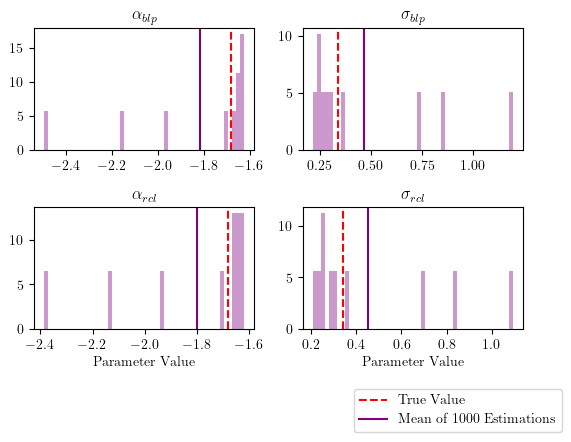

In [6]:

fig, ax = plt.subplots(2, 2, figsize=(6, 5))

purple_color = 'purple'

ax[0, 0].hist(combined_df['a_blp'], bins=50, density=True, color=purple_color, alpha=0.4)
ax[0, 0].axvline(-1.6820276496988864, color='red', linestyle='dashed')
ax[0, 0].axvline(np.mean(combined_df['a_blp']), color=purple_color)
ax[0, 0].set_title('$\\alpha_{blp}$')

ax[0, 1].hist(combined_df['sigma_blp'], bins=50, density=True, color=purple_color, alpha=0.4)
ax[0, 1].axvline(0.3397977879768558, color='red', linestyle='dashed')
ax[0, 1].axvline(np.mean(combined_df['sigma_blp']), color=purple_color)
ax[0, 1].set_title('$\\sigma_{blp}$')

ax[1, 0].hist(combined_df['a_rcl'], bins=50, density=True, color=purple_color, alpha=0.4)
ax[1, 0].axvline(-1.6820276496988864, color='red', linestyle='dashed')
ax[1, 0].axvline(np.mean(combined_df['a_rcl']), color=purple_color)
ax[1, 0].set_title('$\\alpha_{rcl}$')
ax[1, 0].set_xlabel('Parameter Value')


ax[1, 1].hist(combined_df['sigma_rcl'], bins=50, density=True, color=purple_color, alpha=0.4)
ax[1, 1].axvline(0.3397977879768558, color='red', linestyle='dashed')
ax[1, 1].axvline(np.mean(combined_df['sigma_rcl']), color=purple_color)
ax[1, 1].set_title('$\\sigma_{rcl}$')
ax[1, 1].set_xlabel('Parameter Value')

legend_elements = [
    plt.Line2D([0], [0], color='red', linestyle='dashed', label='True Value'),
    plt.Line2D([0], [0], color=purple_color, label='Mean of 1000 Estimations')
]
leg = plt.legend(handles=legend_elements,
            loc='lower left',
            bbox_to_anchor=(0.2, -0.9))

# fig.subplots_adjust(bottom=0.78)
plt.tight_layout()

plt.savefig('../plots/estimation_results_demand_side.pdf')
plt.show()

In [7]:
combined_df.mean()


b2_ols              -0.299970
b3_ols              -0.299942
a_ols               -1.574505
b1_ols               1.857552
a_iv                -1.576486
b2_iv               -0.299970
b3_iv               -0.299989
b1_iv                1.860997
b1_blp               2.178925
b2_blp              -0.300022
b3_blp              -0.300053
a_blp               -1.817773
sigma_blp            0.469141
sigma_rcl            0.452535
a_rcl               -1.801480
b2_rcl              -0.300024
b3_rcl              -0.300049
b1_rcl               2.158173
simulation_number    7.500000
dtype: float64

In [8]:


# Define the parameters and their corresponding values for t-tests
parameters = {
    'b1': {'BLP': 2, 'RCL': 2},
    'b2': {'BLP': -0.3, 'RCL': -0.3},
    'b3': {'BLP': -0.3, 'RCL': -0.3},
    'a': {'BLP': -1.682, 'RCL': -1.682},
    'sigma': {'BLP': 0.34, 'RCL': 0.34}
}

# Perform t-tests and store the results
t_test_results = {}
for param, values in parameters.items():
    t_test_results[param] = {
        'BLP': ttest_1samp(combined_df[param + '_blp'], values['BLP']),
        'RCL': ttest_1samp(combined_df[param + '_rcl'], values['RCL'])
    }

# Generate LaTeX code for the table
table_tex = r'''
\begin{table}[htbp]
\centering
\caption{T-Test Results for BLP and RLC Estimations}
\label{tab:t_test_results}
\begin{tabular}{lcc}
\hline
\textbf{Parameter} & \textbf{BLP} & \textbf{RLC} \\
\hline
'''
for param, results in t_test_results.items():
    row_tex = f"{param} & {results['BLP'].statistic:.3f}, {results['BLP'].pvalue:.3f} & {results['RCL'].statistic:.3f}, {results['RCL'].pvalue:.3f} \\\\"
    table_tex += row_tex + '\n'
table_tex += r'''
\hline
\end{tabular}
\end{table}
'''

# Print the generated LaTeX code
print(table_tex)


\begin{table}[htbp]
\centering
\caption{T-Test Results for BLP and RLC Estimations}
\label{tab:t_test_results}
\begin{tabular}{lcc}
\hline
\textbf{Parameter} & \textbf{BLP} & \textbf{RLC} \\
\hline
b1 & 1.517, 0.164 & 1.491, 0.170 \\
b2 & -0.326, 0.752 & -0.386, 0.708 \\
b3 & -1.248, 0.244 & -1.244, 0.245 \\
a & -1.439, 0.184 & -1.414, 0.191 \\
sigma & 1.207, 0.258 & 1.145, 0.282 \\

\hline
\end{tabular}
\end{table}

